In [1]:
import pandas as pd
df = pd.read_csv('churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop_duplicates(inplace=True)

/tmp/ipython-input-3080622956.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Text(0.5, 1.0, 'Tenure vs Churn')

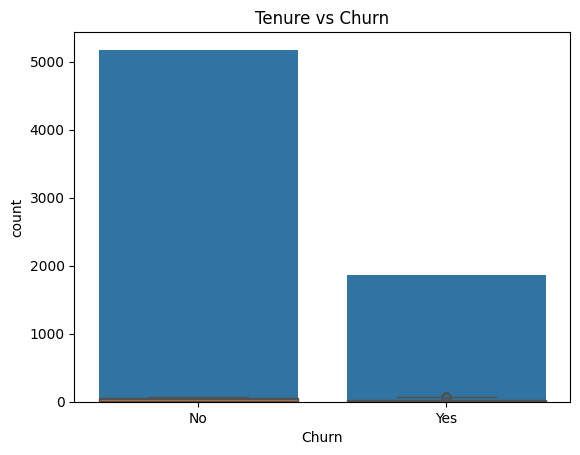

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')


sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')

## Model Training

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score


X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Evaluation

In [7]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Accuracy: 0.8204400283889283
ROC-AUC: 0.8628761373399443


Text(0, 0.5, 'True Positive Rate')

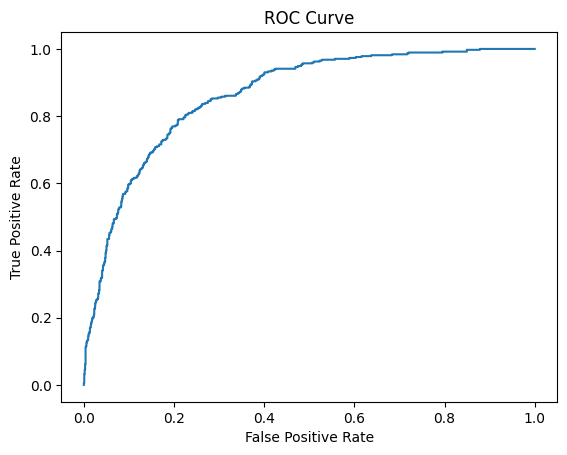

In [8]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [9]:
import joblib
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

In [11]:
from google.colab import files

files.download('churn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>